# Classification

There are two main types of classificationL

* **Supervised classification**, when all the classes are known. In this case, the data are represented by a matrix having the response categorical variable $y$ in the first column.

* **Cluster analysis**, where the classes are not known in advance.

We the denote the set of possible classes using $G$.

If the response variable takes only two values, it is called **binary variable**. If it takes more than two classes, it is called **multinomial variable**.

Most common methods of classification:

Logistic regression, KNN, Linear Discriminant Analysis (LDA), SVM, Decision Trees, Random Forests, GAMs $\implies$ **supervised**

Cluster analysis $\implies$ **unsupervised**

The confusion matrix shows all the missclassified examples in your sample, from which you can compute the classification error. We can compute the confusion matrix on both the train and the test sets.

The global classification error is given by the classification error of each class $i$ times the probability that an individual belongs to class $i$. This is the **empyrical** or **training** classification error, and it typically underestimates the real classification error.

# Logistic Regression

We can model a binary classification problem as a linear problem in which the target is to predict the value of $y$ (which has to be transformed in factor beforehand) by minimizing the error of a linear model on the prediction. We can thus build a rule to represent that

$y_i = 1$ if $\hat{y} \geq 0.5$, $y_i = 0$ if $\hat{y} < 0.5$

If $Y ~ Bern(p)$ we have that $E(Y) = 1p + 0(1-p) = p$. Thus, we can say that $E(Y) = P(1)$.

We are building a model which will return $Pr(Y = 1| X)$, which is the probability of the data point belongs to the default class given its features. We will refer to it as $p(X)$, and it returns a value between 0 and 1. Linear regression doesn't estimate this probability well because some estimated probabilities are below 0 or above 1, so we use the **Logistic Regression**.

If the response variable is multinomial, we can use **Multiclass Logistic Regression**.

The logistic function goes as follows

$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

We can apply a monotonic transformation, called **log odds** or **logit function**, to obtain the linear equation representing our logistic model (defined of the $[-\infty, \infty]$ domain).

$$log(\frac{p(X)}{1 - p(X)} = \beta_0 + \beta_1X$$

It is called log odds because it is simply the logarithm of the odds, represented by

$$\frac{p(X)}{1 - p(X} = e^{\beta_0 + \beta_1X}$$

which are simply the probability of X happening divided by the probability of it not happening.

* a one-unit increase of X changes the log odds by $\beta_1$

* a one-unit increase of X multiplies the odds by $e^{\beta_1}$

* a one-unit increase of X changes p(X) according to the sign of $\beta_1$ and depending on the value of X (the relationship is not linear, is an “S”)



# Generalized Linear Models (GLM)

A family of of models which contains also the Logistic regression.

The models in this family we consider the correct distribution for the response variable, and then we build a linear model in beta parameter by applying a transformation (called **link function**) which transforms the expected value of Y.

For logistic regression the link function is the **logit**, which takes the logarithm of the odds.

To estimate the parameters $\beta_0, \beta_1$ we use the **Maximum Likelihood Criterion**, which gives the probability of the data being described by the model having those as parameters.

In R, we use the `glm` function to perform this estimation.

To use the model for prediction, we simply plug the estimated parameters and then try it for the chosen values of X in order to obtain the probability for the observation to belong in the default class.

The common rule is to define p > 0.5 as the threshold for classifying a result as default. This threshold could be changed in case of false positives or false negatives.


# Multiple Logistic Regression

It is simply an extension of the normal logistic regression

$$p(X) = \frac{e^{\beta_0 + \beta_1X + \dots + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X + \dots + \beta_pX_p}}$$

One of the tasks of multiple regressions is to distinguish the effect of multiple variables on the outcome. This avoids a **confounding** effect brought by non-included variables. When we have multiple variables, we should include them at the beginning of our model analysis to manifest their effect.


# Multiclass Logistic Regression

It is simply an extension of the binary logistic regression

$$p(X) = \frac{e^{\beta_{0k} + \beta_{1k}X_1 + \dots + \beta_{pk}X_p}}{\Sigma_{l = 1}^K e^{\beta_{0l} + \beta_{1l}X + \dots + \beta_{pl}X_p}}$$

# Laboratory: Logistic Regression

In [1]:
library(dplyr)
library(gdata)
library(bestglm) # like leaps, used to select the best subset of variables
library(Fahrmeir)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: ‘gdata’

The following objects are masked from ‘package:dplyr’:

    combine, first, last

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith

Loading required package: leaps


In [2]:
data  <- credit

In [3]:
head(data)

Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
buen,no,10,pre buen pagador,profesional,2241,hombre,no vive solo


In [4]:
summary(data)

    Y                Cuenta         Mes                     Ppag    
 buen:700   no          :274   Min.   : 4.0   pre buen pagador:911  
 mal :300   good running:394   1st Qu.:12.0   pre mal pagador : 89  
            bad running :332   Median :18.0                         
                               Mean   :20.9                         
                               3rd Qu.:24.0                         
                               Max.   :72.0                         
          Uso            DM            Sexo               Estc    
 privado    :657   Min.   :  250   mujer :402   no vive solo:640  
 profesional:343   1st Qu.: 1366   hombre:598   vive solo   :360  
                   Median : 2320                                  
                   Mean   : 3271                                  
                   3rd Qu.: 3972                                  
                   Max.   :18424                                  

In [5]:
# Set variable names to lowercase
names(data) <- names(data) %>% tolower()
# Set levels for factor variables
data %>% select_if(is.factor) %>% sapply(levels)

$y
[1] "buen" "mal" 

$cuenta
[1] "no"           "good running" "bad running" 

$ppag
[1] "pre buen pagador" "pre mal pagador" 

$uso
[1] "privado"     "profesional"

$sexo
[1] "mujer"  "hombre"

$estc
[1] "no vive solo" "vive solo"

In [6]:
data %>% summarise_all(funs(list(levels(.))))

y,cuenta,mes,ppag,uso,dm,sexo,estc
"buen, mal","no , good running, bad running",NULL,"pre buen pagador, pre mal pagador","privado , profesional",NULL,"mujer , hombre","no vive solo, vive solo"


In [7]:
data %>% select_if(is.factor) %>% sapply(mapLevels)

$y
buen  mal 
   1    2 

$cuenta
          no good running  bad running 
           1            2            3 

$ppag
pre buen pagador  pre mal pagador 
               1                2 

$uso
    privado profesional 
          1           2 

$sexo
 mujer hombre 
     1      2 

$estc
no vive solo    vive solo 
           1            2 


In [8]:
# Translate to english and replace levels by factors
colnames(data) <- c("solvency", "account","loan_duration", "prev_pay_behavior", "loan_use", "credit", "sex", "civ_state")
levels(data$solvency) <- c("good", "bad")
levels(data$account) <- c("no", "good", "bad")
levels(data$prev_pay_behavior) <- c("good", "bad")
levels(data$loan_use) <- c("private", "professional")
levels(data$sex) <- c("woman", "man")
levels(data$civ_state) <- c("alone", "not alone")

In [9]:
head(data)

solvency,account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state
good,no,18,good,private,1049,woman,not alone
good,no,9,good,professional,2799,man,alone
good,bad,12,good,professional,841,woman,not alone
good,no,12,good,professional,2122,man,alone
good,no,12,good,professional,2171,man,alone
good,no,10,good,professional,2241,man,alone


In [10]:
# Transforming factors in numerical values
# THIS IS NOT NEEDED IN R, IT IS DONE AUTOMATICALLY.
data_cat  <- data[, c("account", "prev_pay_behavior", "loan_use", "sex", "civ_state")]

In [11]:
data_fact  <- data.frame(model.matrix(~.-1, data))

In [12]:
head(data_fact)

solvencygood,solvencybad,accountgood,accountbad,loan_duration,prev_pay_behaviorbad,loan_useprofessional,credit,sexman,civ_statenot.alone
1,0,0,0,18,0,0,1049,0,1
1,0,0,0,9,0,1,2799,1,0
1,0,0,1,12,0,1,841,0,1
1,0,0,0,12,0,1,2122,1,0
1,0,0,0,12,0,1,2171,1,0
1,0,0,0,10,0,1,2241,1,0


In [13]:
data_fact <- data_fact[,!(names(data_fact) %in% c("solvencygood", "solvencybad"))]

In [14]:
data_fact$y  <- data$solvency

In [15]:
data_fact$y  <- as.numeric(data_fact$y)

In [16]:
data_fact$y  <- data_fact$y - 1

In [17]:
head(data_fact)

accountgood,accountbad,loan_duration,prev_pay_behaviorbad,loan_useprofessional,credit,sexman,civ_statenot.alone,y
0,0,18,0,0,1049,0,1,0
0,0,9,0,1,2799,1,0,0
0,1,12,0,1,841,0,1,0
0,0,12,0,1,2122,1,0,0
0,0,12,0,1,2171,1,0,0
0,0,10,0,1,2241,1,0,0


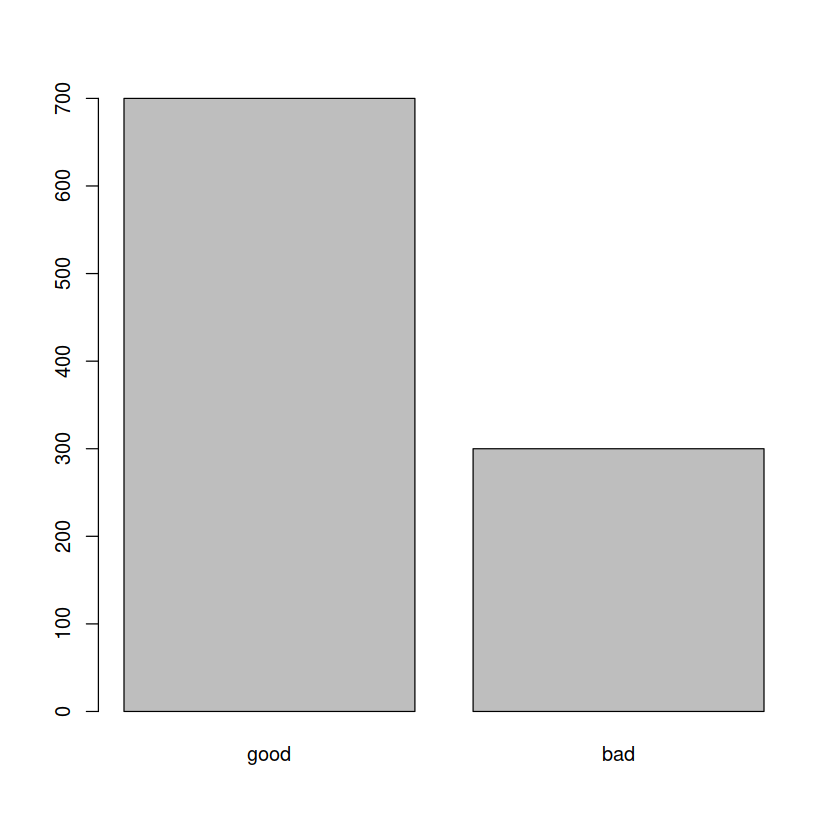

In [18]:
data$solvency  %>% table %>% barplot

In [19]:
# We see relevant variables
mod_c <- glm(y ~ ., family = binomial(link = logit), data = data_fact)
summary(mod_c)


Call:
glm(formula = y ~ ., family = binomial(link = logit), data = data_fact)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0572  -0.8050  -0.4581   0.9483   2.4655  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.178e+00  2.693e-01  -4.374 1.22e-05 ***
accountgood          -1.952e+00  2.060e-01  -9.472  < 2e-16 ***
accountbad           -6.346e-01  1.764e-01  -3.598 0.000321 ***
loan_duration         3.503e-02  7.849e-03   4.463 8.10e-06 ***
prev_pay_behaviorbad  9.884e-01  2.529e-01   3.907 9.33e-05 ***
loan_useprofessional  4.744e-01  1.605e-01   2.956 0.003112 ** 
credit                3.242e-05  3.335e-05   0.972 0.330893    
sexman               -2.235e-01  2.208e-01  -1.012 0.311453    
civ_statenot.alone    3.854e-01  2.194e-01   1.757 0.078921 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.7 

In [20]:
# This represent the odds
# For example, a person with prev_pay_behavior = bad is almost 3 times more
# likely to be insolvent than those with good prev pay behavior
exp(mod_c$coefficients[c(2:3, 5, 6)])

accountgood           accountbad prev_pay_behaviorbad 
           0.1420360            0.5301221            2.6868533 
loan_useprofessional 
           1.6070469

In [21]:
# A more complex model, which improves performances (see lower AIC)
mod2 <- glm(formula = solvency ~ . + I(loan_duration^2) + I(credit^2), family = binomial(link = logit), data = data)
summary(mod2)


Call:
glm(formula = solvency ~ . + I(loan_duration^2) + I(credit^2), 
    family = binomial(link = logit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5094  -0.7844  -0.4684   0.9195   2.5150  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.385e+00  3.665e-01  -3.780 0.000157 ***
accountgood          -1.950e+00  2.070e-01  -9.419  < 2e-16 ***
accountbad           -6.324e-01  1.777e-01  -3.558 0.000373 ***
loan_duration         9.126e-02  2.545e-02   3.586 0.000335 ***
prev_pay_behaviorbad  9.964e-01  2.565e-01   3.885 0.000102 ***
loan_useprofessional  4.481e-01  1.623e-01   2.762 0.005751 ** 
credit               -2.449e-04  1.000e-04  -2.448 0.014361 *  
sexman               -1.764e-01  2.218e-01  -0.795 0.426536    
civ_statenot alone    3.991e-01  2.205e-01   1.810 0.070252 .  
I(loan_duration^2)   -8.666e-04  4.149e-04  -2.089 0.036745 *  
I(credit^2)           2.203e-08  7.528e-09   2

In [22]:
head(data)

solvency,account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state
good,no,18,good,private,1049,woman,not alone
good,no,9,good,professional,2799,man,alone
good,bad,12,good,professional,841,woman,not alone
good,no,12,good,professional,2122,man,alone
good,no,12,good,professional,2171,man,alone
good,no,10,good,professional,2241,man,alone


In [23]:
# Prediction
c("account", "prev_pay_behavior", "loan_use", "sex", "civ_state")
newclient <- data.frame(account="no", 
                        loan_duration=12,
                        prev_pay_behavior="good",
                        loan_use = "private",
                        credit = 1000,
                        sex = "man",
                        civ_state = "not alone")
predict(mod2, newdata=newclient, type="response")

[1] "account"           "prev_pay_behavior" "loan_use"         
[4] "sex"               "civ_state"

1 
0.3976559

In [24]:
# Best subset selection
Xy = data[, 2:8]
Xy$solvency = data$solvency
head(Xy)

account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state,solvency
no,18,good,private,1049,woman,not alone,good
no,9,good,professional,2799,man,alone,good
bad,12,good,professional,841,woman,not alone,good
no,12,good,professional,2122,man,alone,good
no,12,good,professional,2171,man,alone,good
no,10,good,professional,2241,man,alone,good


In [25]:
bestlogistic <- bestglm(Xy = Xy, family = binomial(link = logit), IC = "AIC")

Morgan-Tatar search since family is non-gaussian.
Note: factors present with more than 2 levels.


In [26]:
bestlogistic$BestModels

account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state,Criterion
TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,1031.099
TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,1032.289
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,1032.366
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1033.347
TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,1033.602


In [27]:
summary(bestlogistic$BestModel)


Call:
glm(formula = y ~ ., family = family, data = Xi, weights = weights)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0158  -0.8036  -0.4555   0.9417   2.4438  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.346193   0.210336  -6.400 1.55e-10 ***
accountgood          -1.937717   0.205460  -9.431  < 2e-16 ***
accountbad           -0.617390   0.175739  -3.513 0.000443 ***
loan_duration         0.038855   0.006294   6.174 6.67e-10 ***
prev_pay_behaviorbad  0.987716   0.252670   3.909 9.26e-05 ***
loan_useprofessional  0.469401   0.159682   2.940 0.003286 ** 
civ_statenot alone    0.532731   0.159122   3.348 0.000814 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.7  on 999  degrees of freedom
Residual deviance: 1019.1  on 993  degrees of freedom
AIC: 1033.1

Number of Fisher Scoring iterations: 4


In [28]:
# Add transformations of credit and loan_duration to Xy
Xy  <- Xy[, 1:7]
Xy$loan_duration2  <- data$loan_duration^2
Xy$credit2 <- data$credit^2
Xy$solvency  <- data$solvency
head(Xy)

account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state,loan_duration2,credit2,solvency
no,18,good,private,1049,woman,not alone,324,1100401,good
no,9,good,professional,2799,man,alone,81,7834401,good
bad,12,good,professional,841,woman,not alone,144,707281,good
no,12,good,professional,2122,man,alone,144,4502884,good
no,12,good,professional,2171,man,alone,144,4713241,good
no,10,good,professional,2241,man,alone,100,5022081,good


In [29]:
bestlogistic2  <- bestglm(Xy = Xy, family = binomial(link = logit), IC = "AIC")
bestlogistic$BestModels

Morgan-Tatar search since family is non-gaussian.
Note: factors present with more than 2 levels.


account,loan_duration,prev_pay_behavior,loan_use,credit,sex,civ_state,Criterion
TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,1031.099
TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,1032.289
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,1032.366
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1033.347
TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,1033.602


In [30]:
summary(bestlogistic2$BestModel)


Call:
glm(formula = y ~ ., family = family, data = Xi, weights = weights)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5623  -0.7934  -0.4686   0.9173   2.5127  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.508e+00  3.333e-01  -4.524 6.06e-06 ***
accountgood          -1.946e+00  2.069e-01  -9.406  < 2e-16 ***
accountbad           -6.260e-01  1.774e-01  -3.528 0.000418 ***
loan_duration         9.100e-02  2.547e-02   3.573 0.000353 ***
prev_pay_behaviorbad  9.911e-01  2.565e-01   3.865 0.000111 ***
loan_useprofessional  4.385e-01  1.617e-01   2.712 0.006692 ** 
credit               -2.546e-04  9.938e-05  -2.562 0.010409 *  
civ_statenot alone    5.199e-01  1.603e-01   3.243 0.001184 ** 
loan_duration2       -8.617e-04  4.157e-04  -2.073 0.038180 *  
credit2               2.256e-08  7.516e-09   3.001 0.002687 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter fo

In [31]:
# We get a better model, since the AIC score is lower than before!